Unveiling Insights: Exploratory Data Analysis of Construction Project Management Data using Python


In the dynamic realm of construction project management, the amalgamation of technological prowess and industry expertise opens a gateway to unparalleled insights. With a decade of professional experience as a quantity surveyor, the quest to synergize construction knowledge with technological proficiency led to the exploration of a dataset derived from project management field applications. This dataset encapsulates the intricacies of quality assurance, safety protocols, and site management through two key files: Construction Data PM Forms and Construction Data PM Tasks.

In this journey, the goal is to unravel patterns, glean trends, and distill actionable intelligence from the wealth of data generated across diverse construction sites. The dataset, generously contributed by Jason Rymer, a BIM Manager from Ireland, serves as a valuable resource for aspiring data enthusiasts within the construction industry. The focus lies not just in decoding the dataset's intricacies but in empowering professionals to traverse the intersection of coding and construction data.

As we delve into the forms generated from quality checklists and action-oriented tasks, the aim is to decipher the underlying narrative that can pave the way for enhanced efficiency, cost-effectiveness, and informed decision-making within the construction landscape. Through the lens of Python and data analytics, this exploration strives to not only decode the data but also inspire the construction community to embrace the transformative power of data-driven insights.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.utils import shuffle
from sklearn.dummy import DummyRegressor

In [2]:
forms_df = pd.read_csv('Construction_Data_PM_Forms_All_Projects.csv')

tasks_df= pd.read_csv('Construction_Data_PM_Tasks_All_Projects.csv')

In [3]:
# Get the size of the dataset
dataset_size = forms_df.shape

# Display the size of the dataset
print("Forms Dataset Size:")
print(f"Number of Rows: {dataset_size[0]}")
print(f"Number of Columns: {dataset_size[1]}")

# Get the size of the dataset
dataset_size = tasks_df.shape

# Display the size of the dataset
print("Forms tasks Size:")
print(f"Number of Rows: {dataset_size[0]}")
print(f"Number of Columns: {dataset_size[1]}")

Forms Dataset Size:
Number of Rows: 10254
Number of Columns: 17
Forms tasks Size:
Number of Rows: 12424
Number of Columns: 19


In [4]:
# Displaying the size of the Forms dataset
# Number of Rows: 10254 indicates the total instances or records present in the dataset.
# Number of Columns: 17 signifies the count of different attributes or features captured in each record.


In [5]:
# Checking the data types of each column in the Forms dataset
data_types = forms_df.dtypes

# Displaying the data types
print("Forms Dataset Data Types:")
print(data_types)


Forms Dataset Data Types:
Ref                    object
Status                 object
Location               object
Name                   object
Created                object
Type                   object
Status Changed         object
Open Actions            int64
Total Actions           int64
Association            object
OverDue                  bool
Images                   bool
Comments                 bool
Documents              object
Project                 int64
Report Forms Status    object
Report Forms Group     object
dtype: object


In [6]:
# Assuming the date format is DD/MM/YYYY
forms_df['Created'] = pd.to_datetime(forms_df['Created'], format='%d/%m/%Y')
forms_df['Status Changed'] = pd.to_datetime(forms_df['Status Changed'], format='%d/%m/%Y')



In [7]:
# Checking the data types of each column in the Forms dataset
data_types = forms_df.dtypes

# Displaying the data types
print("Forms Dataset Data Types:")
print(data_types)

Forms Dataset Data Types:
Ref                            object
Status                         object
Location                       object
Name                           object
Created                datetime64[ns]
Type                           object
Status Changed         datetime64[ns]
Open Actions                    int64
Total Actions                   int64
Association                    object
OverDue                          bool
Images                           bool
Comments                         bool
Documents                      object
Project                         int64
Report Forms Status            object
Report Forms Group             object
dtype: object


In [8]:
# Checking the data types of each column in the Forms dataset
data_types = tasks_df.dtypes

# Displaying the data types
print("Forms tasks Data Types:")
print(data_types)

Forms tasks Data Types:
Ref                object
Status             object
Location           object
Description        object
Created            object
Target            float64
Type               object
To Package         object
Status Changed     object
Association        object
OverDue              bool
Images             object
Comments           object
Documents          object
Priority           object
Cause              object
project             int64
Report Status      object
Task Group         object
dtype: object


In [9]:
# Assuming the date format is DD/MM/YYYY
tasks_df['Created'] = pd.to_datetime(tasks_df['Created'], format='%d/%m/%Y')


In [10]:
forms_df.describe()


,Open Actions,Total Actions,Project
count,10254.00000,10254.000000,10254.000000
mean,0.05315,0.864541,1331.690072
std,0.54720,2.702933,5.143594
min,0.00000,0.000000,1328.000000
25%,0.00000,0.000000,1328.000000
50%,0.00000,0.000000,1329.000000
75%,0.00000,0.000000,1335.000000
max,19.00000,31.000000,1345.000000


In [11]:
# Statistical summary for the 'Open Actions', 'Total Actions', and 'Project' columns in the Forms dataset
# The 'count' row indicates the number of non-null values in each column.
# The 'mean' row represents the average value of each column.
# The 'std' row shows the standard deviation, providing a measure of the amount of variation in the data.
# The 'min' and 'max' rows denote the minimum and maximum values observed in each column.
# The quartile rows ('25%', '50%', '75%') represent the values below which a given percentage of data falls.
# These statistics offer insights into the distribution and characteristics of the numerical columns in the dataset.


In [12]:
tasks_df.describe()


,Target,project
count,2568.000000,12424.000000
mean,43968.516355,1332.585480
std,105.261518,5.213831
min,43590.000000,1328.000000
25%,43923.750000,1328.000000
50%,44000.000000,1330.000000
75%,44041.000000,1338.000000
max,44106.000000,1345.000000


In [13]:
forms_df.head()

,Ref,Status,Location,Name,Created,Type,Status Changed,Open Actions,Total Actions,Association,OverDue,Images,Comments,Documents,Project,Report Forms Status,Report Forms Group
0,F145185.4,Opened,01 Daily Site Diary>Site Management>JPC Projec...,1328 CM-SM-FRM-001 Site Diary,2020-09-15,Site Management,2020-09-15,0,0,NaN,False,True,False,False,1328,Open,Site Management
1,F1.495500,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,NaN,False,False,False,False,1328,Open,Subcontractor
2,F1.495499,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,NaN,False,False,False,False,1328,Open,Subcontractor
3,F1.495498,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,NaN,False,False,False,False,1328,Open,Subcontractor
4,F1.495496,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,NaN,False,False,False,False,1328,Open,Subcontractor


In [14]:
# Checking for null values in the Forms dataset
null_values = forms_df.isnull().sum()

# Displaying the count of null values for each column
print("Null Values in Forms Dataset:")
print(null_values)


Null Values in Forms Dataset:
Ref                       0
Status                    0
Location                  0
Name                      0
Created                   0
Type                      0
Status Changed            0
Open Actions              0
Total Actions             0
Association            8156
OverDue                   0
Images                    0
Comments                  0
Documents               804
Project                   0
Report Forms Status       2
Report Forms Group        4
dtype: int64


In [15]:


# Dropping specific columns from the Forms dataset
columns_to_drop = ['Association', 'Images', 'Comments', 'Documents']
forms_df = forms_df.drop(columns=columns_to_drop)

# Displaying the Forms dataset after dropping the columns
print("Forms Dataset After Dropping Columns:")
print(forms_df.head())

Forms Dataset After Dropping Columns:
         Ref                Status  \
0  F145185.4                Opened   
1  F1.495500  Open / Ongoing Works   
2  F1.495499  Open / Ongoing Works   
3  F1.495498  Open / Ongoing Works   
4  F1.495496  Open / Ongoing Works   

                                            Location  \
0  01 Daily Site Diary>Site Management>JPC Projec...   
1  02 Daily Work Plan>Site Management>JPC Project...   
2  02 Daily Work Plan>Site Management>JPC Project...   
3  02 Daily Work Plan>Site Management>JPC Project...   
4  02 Daily Work Plan>Site Management>JPC Project...   

                             Name    Created                       Type  \
0   1328 CM-SM-FRM-001 Site Diary 2020-09-15            Site Management   
1  SM-FRM-SUB-101 Daily Work Plan 2020-09-15  Subcontractor Inspections   
2  SM-FRM-SUB-101 Daily Work Plan 2020-09-15  Subcontractor Inspections   
3  SM-FRM-SUB-101 Daily Work Plan 2020-09-15  Subcontractor Inspections   
4  SM-FRM-SUB-101 Dai

In [16]:
# Checking for null values in the Forms dataset
null_values = forms_df.isnull().sum()

# Displaying the count of null values for each column
print("Null Values in Forms Dataset:")
print(null_values)

Null Values in Forms Dataset:
Ref                    0
Status                 0
Location               0
Name                   0
Created                0
Type                   0
Status Changed         0
Open Actions           0
Total Actions          0
OverDue                0
Project                0
Report Forms Status    2
Report Forms Group     4
dtype: int64


In [17]:
# Dropping rows with null values in specific columns from the Forms dataset
columns_with_nulls = ['Report Forms Status', 'Report Forms Group']
forms_df = forms_df.dropna(subset=columns_with_nulls)

# Displaying the Forms dataset after dropping rows with null values
print("Forms Dataset After Dropping Rows with Null Values:")
print(forms_df.head())


Forms Dataset After Dropping Rows with Null Values:
         Ref                Status  \
0  F145185.4                Opened   
1  F1.495500  Open / Ongoing Works   
2  F1.495499  Open / Ongoing Works   
3  F1.495498  Open / Ongoing Works   
4  F1.495496  Open / Ongoing Works   

                                            Location  \
0  01 Daily Site Diary>Site Management>JPC Projec...   
1  02 Daily Work Plan>Site Management>JPC Project...   
2  02 Daily Work Plan>Site Management>JPC Project...   
3  02 Daily Work Plan>Site Management>JPC Project...   
4  02 Daily Work Plan>Site Management>JPC Project...   

                             Name    Created                       Type  \
0   1328 CM-SM-FRM-001 Site Diary 2020-09-15            Site Management   
1  SM-FRM-SUB-101 Daily Work Plan 2020-09-15  Subcontractor Inspections   
2  SM-FRM-SUB-101 Daily Work Plan 2020-09-15  Subcontractor Inspections   
3  SM-FRM-SUB-101 Daily Work Plan 2020-09-15  Subcontractor Inspections   
4  SM-F

In [18]:
# Checking for null values in the Forms dataset
null_values = forms_df.isnull().sum()

# Displaying the count of null values for each column
print("Null Values in Forms Dataset:")
print(null_values)

Null Values in Forms Dataset:
Ref                    0
Status                 0
Location               0
Name                   0
Created                0
Type                   0
Status Changed         0
Open Actions           0
Total Actions          0
OverDue                0
Project                0
Report Forms Status    0
Report Forms Group     0
dtype: int64


In [19]:
# Generating descriptive statistics for the Forms dataset
descriptive_stats = forms_df.describe(include='all')

# Displaying the descriptive statistics
print("Descriptive Statistics for Forms Dataset:")
print(descriptive_stats)

# Exploring summary statistics, distributions, and correlations between variables
correlation_matrix = forms_df.corr()

# Displaying the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Descriptive Statistics for Forms Dataset:
              Ref  Status                                           Location  \
count       10248   10248                                              10248   
unique       9852      25                                                814   
top     F143862.2  Closed  01 Daily Site Diary>Site Management>JPC Projec...   
freq            2    3383                                               1346   
first         NaN     NaN                                                NaN   
last          NaN     NaN                                                NaN   
mean          NaN     NaN                                                NaN   
std           NaN     NaN                                                NaN   
min           NaN     NaN                                                NaN   
25%           NaN     NaN                                                NaN   
50%           NaN     NaN                                                NaN  

C:\Users\enhan\AppData\Local\Temp\ipykernel_34420\2587189950.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_stats = forms_df.describe(include='all')
C:\Users\enhan\AppData\Local\Temp\ipykernel_34420\2587189950.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_stats = forms_df.describe(include='all')
C:\Users\enhan\AppData\Local\Temp\ipykernel_34420\2587189950.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to 

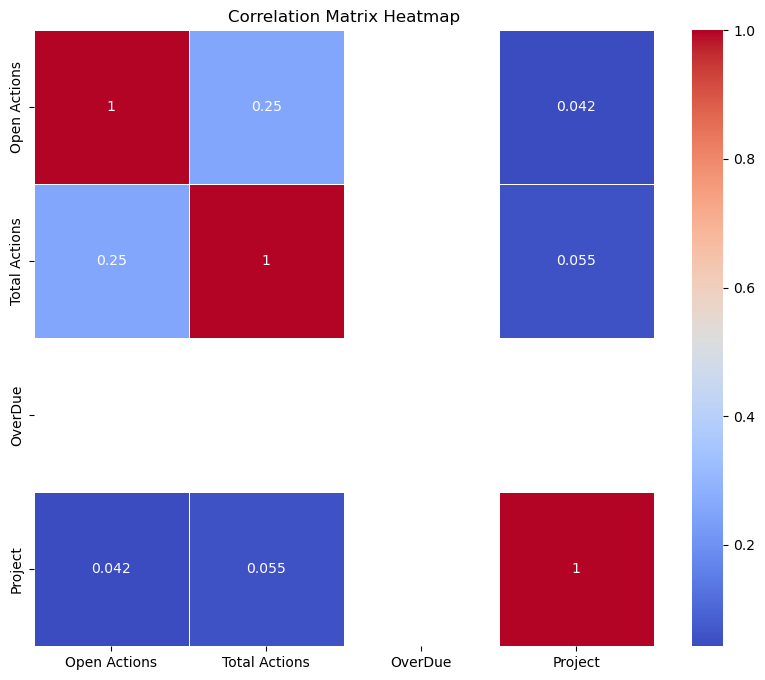

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Summary of Descriptive Statistics for Forms Dataset:**

**1. Count and Unique Values:**
   - The dataset consists of 10,248 records.
   - 'Ref' has 9,852 unique values, suggesting some repeated references.
   - 'Status' has 25 unique values, indicating different statuses.
   - 'Location' has 814 unique values, reflecting diverse project locations.
   - 'Name' has 124 unique values, representing various types of forms.
   - 'Type' has 12 unique values, categorizing forms into different types.

**2. Top and Frequency:**
   - The most frequent 'Ref' is 'F143862.2,' occurring twice.
   - 'Closed' is the most frequent 'Status,' appearing 3,383 times.
   - The most common 'Location' is related to daily site diaries.
   - The most frequent 'Name' is 'SM-FRM-001 Daily Site Diary,' occurring 1,302 times.
   - 'Site Management' is the most frequent 'Type,' appearing 2,984 times.
   - 'Closed' is the most frequent 'Report Forms Status,' occurring 7,535 times.
   - 'Quality' is the most frequent 'Report Forms Group,' appearing 4,481 times.

**3. Date-related Information:**
   - 'Created' ranges from January 4, 2019, to December 9, 2020.
   - 'Status Changed' ranges from January 7, 2019, to December 9, 2020.

**4. Numerical Summary:**
   - 'Open Actions' and 'Total Actions' have mean values of approximately 0.05 and 0.87, respectively.
   - 'Open Actions' and 'Total Actions' show low standard deviations, indicating limited variability.
   - 'Project' ranges from 1,328 to 1,345.
   - 'OverDue' is a boolean column, indicating whether the form action was overdue (False for all records).

**5. Correlation Matrix:**
   - 'Open Actions' and 'Total Actions' show a positive correlation of approximately 0.25.
   - 'Project' has a weak positive correlation with 'Open Actions' and 'Total Actions.'



In [21]:
forms_df.head(20)

,Ref,Status,Location,Name,Created,Type,Status Changed,Open Actions,Total Actions,OverDue,Project,Report Forms Status,Report Forms Group
0,F145185.4,Opened,01 Daily Site Diary>Site Management>JPC Projec...,1328 CM-SM-FRM-001 Site Diary,2020-09-15,Site Management,2020-09-15,0,0,False,1328,Open,Site Management
1,F1.495500,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,False,1328,Open,Subcontractor
2,F1.495499,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,False,1328,Open,Subcontractor
3,F1.495498,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,False,1328,Open,Subcontractor
4,F1.495496,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,False,1328,Open,Subcontractor
5,F1.495479,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,False,1328,Open,Subcontractor
6,F124541.22,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-14,Subcontractor Inspections,2020-09-14,0,0,False,1328,Open,Subcontractor
7,F124541.21,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-14,Subcontractor Inspections,2020-09-14,0,0,False,1328,Open,Subcontractor
8,F1.495343,Subcontractor Signed Off,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-14,Subcontractor Inspections,2020-09-14,0,0,False,1328,Closed,Subcontractor
9,F1.495319,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-14,Subcontractor Inspections,2020-09-14,0,0,False,1328,Open,Subcontractor


In [22]:
# Assuming 'OverDue' is a boolean column in the Forms dataset
overdue_projects_count = forms_df[forms_df['OverDue'] == True]['Project'].nunique()

# Displaying the count of overdue projects
print(f"Number of Overdue Projects: {overdue_projects_count}")


Number of Overdue Projects: 0


In [23]:
tasks_df.head()

,Ref,Status,Location,Description,Created,Target,Type,To Package,Status Changed,Association,OverDue,Images,Comments,Documents,Priority,Cause,project,Report Status,Task Group
0,T1.23963030,Open,JPC Project Management>EHS Management>01 Inspe...,task raised in incorrect location of this form...,2020-09-14,NaN,Safety Notice (Amber) - General Issue,Main Contractor,14/09/2020,FormAnswer,False,NaN,NaN,NaN,Behavioural Failure,JPC - Safety - Documentation,1328,Open,Safety
1,T116412.200,Closed,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Metsec,2020-09-14,NaN,JPC - Progress Photo,Ceilings & Partitions,14/09/2020,NaN,False,True,False,False,NaN,NaN,1328,Closed,Site Management
2,T141663.27,EHS Good Observation,JPC Project Management>EHS Management>01 Inspe...,Good clear exclusion zones and access through ...,2020-09-14,NaN,Safety Notice (Green) - Good Observation,Main Contractor,14/09/2020,FormAnswer,False,True,False,False,NaN,JPC - Safety - Access,1328,Closed,Safety
3,T116412.199,Closed,QC & BC(A)R>ITP 02 Architectural & M&E Service...,RC walls,2020-09-14,NaN,JPC - Progress Photo,Precast Concrete,14/09/2020,NaN,False,True,False,False,NaN,NaN,1328,Closed,Site Management
4,T141663.26,EHS Good Observation,JPC Project Management>EHS Management>01 Inspe...,"block 02 working level has good housekeeping, ...",2020-09-14,NaN,Safety Notice (Green) - Good Observation,Precast Concrete,14/09/2020,FormAnswer,False,True,False,False,NaN,JPC - Safety - House Keeping,1328,Closed,Safety


In [24]:
# Checking for null values in the tasks_df DataFrame
null_values_tasks = tasks_df.isnull().sum()

# Displaying the count of null values for each column
print("Null Values in tasks_df DataFrame:")
print(null_values_tasks)


Null Values in tasks_df DataFrame:
Ref                   0
Status                0
Location              0
Description           0
Created               0
Target             9856
Type                  0
To Package         1042
Status Changed        0
Association        2941
OverDue               0
Images              152
Comments            522
Documents           644
Priority          10058
Cause              2741
project               0
Report Status         0
Task Group           50
dtype: int64


In [25]:
# Assuming 'Priority' is the column you want to get value counts for
priority_counts = tasks_df['Priority'].value_counts()

# Displaying the value counts for each unique priority
print("Value Counts for Priority:")
print(priority_counts)


Value Counts for Priority:
Behavioural Failure                                                 951
System Failure                                                      787
Medium                                                              221
High                                                                214
Best Practice                                                        83
System Failure - Deviation from RAMS / Manufacturer Instructions     31
Low                                                                  29
.                                                                    27
2 Week Look Ahead                                                    13
Low (resolve within 2 weeks)                                          3
Medium (resolve within 5 days)                                        2
High (resolve within 48 hours)                                        2
1 Week Look Ahead                                                     2
1 Month Look Ahead                   

In [26]:
# Replace null values in 'Priority' column with 'Low'
tasks_df['Priority'].fillna('Low', inplace=True)

# Displaying the tasks_df DataFrame after replacing null values in 'Priority'
print("tasks_df DataFrame After Replacing Null Values in 'Priority':")
print(tasks_df.head())



tasks_df DataFrame After Replacing Null Values in 'Priority':
           Ref                Status  \
0  T1.23963030                  Open   
1  T116412.200                Closed   
2   T141663.27  EHS Good Observation   
3  T116412.199                Closed   
4   T141663.26  EHS Good Observation   

                                            Location  \
0  JPC Project Management>EHS Management>01 Inspe...   
1  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
2  JPC Project Management>EHS Management>01 Inspe...   
3  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
4  JPC Project Management>EHS Management>01 Inspe...   

                                         Description    Created  Target  \
0  task raised in incorrect location of this form... 2020-09-14     NaN   
1                                             Metsec 2020-09-14     NaN   
2  Good clear exclusion zones and access through ... 2020-09-14     NaN   
3                                           RC walls 2020-09

In [27]:
# Drop specified columns
columns_to_drop = ['Target', 'To Package', 'Association', 'Images', 'Comments', 'Documents']
tasks_df = tasks_df.drop(columns=columns_to_drop)

# Replace values in 'Cause' based on 'Priority' and drop rows where 'Priority' is not 'High'
tasks_df.loc[tasks_df['Priority'] == 'High', 'Cause'] = 'Design'
tasks_df = tasks_df[tasks_df['Priority'] == 'High']

# Drop rows with null values in 'Task Group'
tasks_df = tasks_df.dropna(subset=['Task Group'])

# Display the tasks_df DataFrame after the operations
print("tasks_df DataFrame After Operations:")
print(tasks_df.head())


tasks_df DataFrame After Operations:
             Ref                       Status  \
53    T118982.21         Open / Ongoing Works   
111   T84104.964    Works Complete / Resolved   
142   T113721.72         Open / Ongoing Works   
174  T1.23728035  3rd Party Sign Off - Closed   
205  T1.23723958         Open / Ongoing Works   

                                              Location  \
53   QC & BC(A)R>ITP 02 Architectural & M&E Service...   
111  QC & BC(A)R>ITP 01 Structural>Block 1>4th Floo...   
142  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
174  QC & BC(A)R>ITP 01 Structural>Block 2>5th Floo...   
205  QC & BC(A)R>ITP 01 Structural>Block 1>3rd Floo...   

                                           Description    Created  \
53                               Design not finalised  2020-09-10   
111  Joint between precast walls is too big. Expand... 2020-09-07   
142  lang Fenster snags B3 A1 L1 courtyard North. w... 2020-09-03   
174  Ensure Anti-Crack Bars are installed. 

In [28]:
# Checking for null values in the tasks_df DataFrame
null_values_tasks = tasks_df.isnull().sum()

# Displaying the count of null values for each column
print("Null Values in tasks_df DataFrame:")
print(null_values_tasks)

Null Values in tasks_df DataFrame:
Ref               0
Status            0
Location          0
Description       0
Created           0
Type              0
Status Changed    0
OverDue           0
Priority          0
Cause             0
project           0
Report Status     0
Task Group        0
dtype: int64


In [29]:
tasks_df.head(20)

,Ref,Status,Location,Description,Created,Type,Status Changed,OverDue,Priority,Cause,project,Report Status,Task Group
53,T118982.21,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Design not finalised,2020-09-10,Design Team - BCAR Architectural,10/09/2020,False,High,Design,1328,Open,Design Team
111,T84104.964,Works Complete / Resolved,QC & BC(A)R>ITP 01 Structural>Block 1>4th Floo...,Joint between precast walls is too big. Expand...,2020-09-07,JPC - Quality Defect (compliance),10/09/2020,True,High,Design,1328,Open,Quality
142,T113721.72,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,lang Fenster snags B3 A1 L1 courtyard North. w...,2020-09-03,JPC - Quality Snag (aesthetic),03/09/2020,True,High,Design,1328,Open,Quality
174,T1.23728035,3rd Party Sign Off - Closed,QC & BC(A)R>ITP 01 Structural>Block 2>5th Floo...,Ensure Anti-Crack Bars are installed. \nDeck t...,2020-09-02,Design Team - BCAR Structural,08/09/2020,False,High,Design,1328,Closed,Design Team
205,T1.23723958,Open / Ongoing Works,QC & BC(A)R>ITP 01 Structural>Block 1>3rd Floo...,Block 01 Level 3. 2 No. 200x200x12.5 SHS beams...,2020-09-01,Design Team - BCAR Structural,01/09/2020,True,High,Design,1328,Open,Design Team
220,T113721.69,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,MC 18 snags\n1) EPDM tape delaminated.\n2) Dra...,2020-09-01,JPC - Quality Snag (aesthetic),01/09/2020,True,High,Design,1328,Open,Quality
224,T113721.67,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,MC 18 snags\n1) EPDM tape delaminated.\n2) Dra...,2020-09-01,JPC - Quality Snag (aesthetic),01/09/2020,True,High,Design,1328,Open,Quality
231,T113721.65,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,1) EPDM tape delaminated. \n2) EPDM tape to be...,2020-09-01,JPC - Quality Snag (aesthetic),01/09/2020,True,High,Design,1328,Open,Quality
302,T116412.141,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Samsung AC units to be protected. Tritech to a...,2020-08-27,JPC - Quality Snag (aesthetic),27/08/2020,True,High,Design,1328,Open,Quality
316,T1.23668510,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,refer report issued on 14/08 for progress Benc...,2020-08-26,Design Team - BCAR Architectural,26/08/2020,True,High,Design,1328,Open,Design Team


In [30]:
forms_df.head(20)

,Ref,Status,Location,Name,Created,Type,Status Changed,Open Actions,Total Actions,OverDue,Project,Report Forms Status,Report Forms Group
0,F145185.4,Opened,01 Daily Site Diary>Site Management>JPC Projec...,1328 CM-SM-FRM-001 Site Diary,2020-09-15,Site Management,2020-09-15,0,0,False,1328,Open,Site Management
1,F1.495500,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,False,1328,Open,Subcontractor
2,F1.495499,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,False,1328,Open,Subcontractor
3,F1.495498,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,False,1328,Open,Subcontractor
4,F1.495496,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,False,1328,Open,Subcontractor
5,F1.495479,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,2020-09-15,0,0,False,1328,Open,Subcontractor
6,F124541.22,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-14,Subcontractor Inspections,2020-09-14,0,0,False,1328,Open,Subcontractor
7,F124541.21,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-14,Subcontractor Inspections,2020-09-14,0,0,False,1328,Open,Subcontractor
8,F1.495343,Subcontractor Signed Off,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-14,Subcontractor Inspections,2020-09-14,0,0,False,1328,Closed,Subcontractor
9,F1.495319,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-14,Subcontractor Inspections,2020-09-14,0,0,False,1328,Open,Subcontractor


In [31]:
# Define Features (X) and Target Variable (y)

# Features (X) include relevant columns such as 'Location', 'Type', 'Priority', and 'Cause'.
# These columns are chosen as potential predictors for predicting task overdue status.


# Target Variable (y) is set to the 'OverDue' column, indicating whether a task is overdue or not.
# This is the variable we aim to predict using the selected features.



In [32]:
# Assuming 'Location' is the column you want to get value counts for
location_counts = tasks_df['Location'].value_counts()

# Displaying the value counts for each unique location
print("Value Counts for Location:")
print(location_counts)


Value Counts for Location:
QC & BC(A)R>ITP 02 Architectural & M&E Services>Block 3>1st Floor Plan              23
Quality Control>ITP 04 M&E Services                                                 16
JPC Project Management>Site Management>Daily Site Diary                             12
Quality Control>ITP 01 Structural>Lvl 00 Ground Floor                               10
Quality Control>ITP 01 Structural>LV -01 Basement                                   10
                                                                                    ..
QC & BC(A)R>ITP 01 Structural>Block 3>1st Floor Plan>Precast Walls>Walls Area A3     1
QC & BC(A)R>ITP 01 Structural>Block 4>1st Floor Plan                                 1
QC & BC(A)R>ITP 01 Structural>Block 1>4th Floor Plan                                 1
QC & BC(A)R>ITP 01 Structural>Block 3>3rd Floor Plan>Precast Slabs>Area A1           1
JPC Project Management>EHS Inspections & Assessments                                 1
Name: Location, 

In [33]:

# Mapping of types to numerical labels
type_mapping = {
    'BCAR - Architectural': 1,
    'BCAR - Assign certifier': 2,
    'BCAR - Electrical': 3,
    'BCAR - Fire': 4,
    'BCAR - Notification': 5,
    'BCAR - Specialist Sub-Contractor': 6,
    'BCAR - Structural': 7,
    'Design Team - BCAR Architectural': 8,
    'Design Team - BCAR Assign Certifier': 9,
    'Design Team - BCAR Electrical': 10,
    'Design Team - BCAR Mechanical': 11,
    'Design Team - BCAR Specialist Sub-Contractor': 12,
    'Design Team - BCAR Structural': 13,
    'Design Team - Defect (Non BC(A)R)': 14,
    'Design Team - Good Quality Observation': 15,
    'Design Team - Snag (Non BC(A)R)': 16,
    'Design Team - Works To Go': 17,
    'Design Team Snag': 18,
    'JPC - BCAR Notification': 19,
    'JPC - Good Quality Observation': 20,
    'JPC - Material Delivery': 21,
    'JPC - Progress Photo': 22,
    'JPC - Quality Defect (compliance)': 23,
    'JPC - Quality Snag (aesthetic)': 24,
    'JPC - Upcoming Work Planning': 25,
    'JPC - Works To Go': 26,
    'Photo Record': 27,
    'Program Constraint Task (Last Planner)': 28,
    'Quality - Defect (compliance)': 29,
    'Quality - Good Observation': 30,
    'Quality - Snag (aesthetic)': 31,
    'Quality - Works To Complete': 32,
    'Safety Notice (Amber) - General Issue': 33,
    'Safety Notice (Green) - Good Observation': 34,
    'Safety Notice (Red) - Serious Issue': 35,
    'SubCon - Fire Stopping Record': 36,
    'SubCon - Photo Record': 37,
}

# Use the map function to replace values with numerical labels
tasks_df['Type'] = tasks_df['Type'].map(type_mapping)

# Display the updated 'Type' column with numerical labels
print("Updated 'Type' Column:")
print(tasks_df['Type'])


Updated 'Type' Column:
53        8
111      23
142      24
174      13
205      13
         ..
10036    23
10148     8
11767    35
11804    35
12050    35
Name: Type, Length: 214, dtype: int64


In [34]:
tasks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 53 to 12050
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Ref             214 non-null    object        
 1   Status          214 non-null    object        
 2   Location        214 non-null    object        
 3   Description     214 non-null    object        
 4   Created         214 non-null    datetime64[ns]
 5   Type            214 non-null    int64         
 6   Status Changed  214 non-null    object        
 7   OverDue         214 non-null    bool          
 8   Priority        214 non-null    object        
 9   Cause           214 non-null    object        
 10  project         214 non-null    int64         
 11  Report Status   214 non-null    object        
 12  Task Group      214 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(9)
memory usage: 21.9+ KB


In [35]:
tasks_df.head(20)

,Ref,Status,Location,Description,Created,Type,Status Changed,OverDue,Priority,Cause,project,Report Status,Task Group
53,T118982.21,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Design not finalised,2020-09-10,8,10/09/2020,False,High,Design,1328,Open,Design Team
111,T84104.964,Works Complete / Resolved,QC & BC(A)R>ITP 01 Structural>Block 1>4th Floo...,Joint between precast walls is too big. Expand...,2020-09-07,23,10/09/2020,True,High,Design,1328,Open,Quality
142,T113721.72,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,lang Fenster snags B3 A1 L1 courtyard North. w...,2020-09-03,24,03/09/2020,True,High,Design,1328,Open,Quality
174,T1.23728035,3rd Party Sign Off - Closed,QC & BC(A)R>ITP 01 Structural>Block 2>5th Floo...,Ensure Anti-Crack Bars are installed. \nDeck t...,2020-09-02,13,08/09/2020,False,High,Design,1328,Closed,Design Team
205,T1.23723958,Open / Ongoing Works,QC & BC(A)R>ITP 01 Structural>Block 1>3rd Floo...,Block 01 Level 3. 2 No. 200x200x12.5 SHS beams...,2020-09-01,13,01/09/2020,True,High,Design,1328,Open,Design Team
220,T113721.69,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,MC 18 snags\n1) EPDM tape delaminated.\n2) Dra...,2020-09-01,24,01/09/2020,True,High,Design,1328,Open,Quality
224,T113721.67,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,MC 18 snags\n1) EPDM tape delaminated.\n2) Dra...,2020-09-01,24,01/09/2020,True,High,Design,1328,Open,Quality
231,T113721.65,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,1) EPDM tape delaminated. \n2) EPDM tape to be...,2020-09-01,24,01/09/2020,True,High,Design,1328,Open,Quality
302,T116412.141,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Samsung AC units to be protected. Tritech to a...,2020-08-27,24,27/08/2020,True,High,Design,1328,Open,Quality
316,T1.23668510,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,refer report issued on 14/08 for progress Benc...,2020-08-26,8,26/08/2020,True,High,Design,1328,Open,Design Team


In [36]:
print(forms_df['Type'].value_counts())


Site Management              2984
Safety Forms                 2139
Quality 01 Structural        1729
Quality 02 Architectural     1417
Quality 00 General           1165
Subcontractor Inspections     466
Design Team / BC(A)R          145
Quality 04 MEP Services       108
Quality 03 Civil               39
BU - Head Office               31
Inspection                     23
Permits                         2
Name: Type, dtype: int64


In [37]:
# Print the updated 'Type' column
print("Updated 'Type' Column:")
print(tasks_df['Type'])


Updated 'Type' Column:
53        8
111      23
142      24
174      13
205      13
         ..
10036    23
10148     8
11767    35
11804    35
12050    35
Name: Type, Length: 214, dtype: int64


In [38]:
# Mapping of priorities to numerical labels
priority_mapping = {
    '1 Month Look Ahead': 1,
    '1 Month Look Ahead ': 2,
    '1 Month Look Ahead  ': 3,
    'Behavioural Failure': 4,
    'Best Practice': 5,
    'High': 6,
    'High (resolve within 48 hours)': 7,
    'Low': 8,
    'Low (resolve within 2 weeks)': 9,
    'Medium': 10,
    'Medium (resolve within 5 days)': 11,
    'System Failure': 12,
    'System Failure - Deviation from RAMS / Manufacturer Instructions': 13,
}

# Use the map function to replace values with numerical labels
tasks_df['Priority'] = tasks_df['Priority'].map(priority_mapping)

# Display the updated 'Priority' column with numerical labels
print("Updated 'Priority' Column:")
print(tasks_df['Priority'])


Updated 'Priority' Column:
53       6
111      6
142      6
174      6
205      6
        ..
10036    6
10148    6
11767    6
11804    6
12050    6
Name: Priority, Length: 214, dtype: int64


In [39]:
# Mapping of task groups to numerical labels
task_group_mapping = {
    'Design Team': 1,
    'Quality': 2,
    'Safety': 3,
    'Site Management': 4,
}

# Use the map function to replace values with numerical labels
tasks_df['Task Group'] = tasks_df['Task Group'].map(task_group_mapping)

# Display the updated 'Task Group' column with numerical labels
print("Updated 'Task Group' Column:")
print(tasks_df['Task Group'])


Updated 'Task Group' Column:
53       1
111      2
142      2
174      1
205      1
        ..
10036    2
10148    1
11767    3
11804    3
12050    3
Name: Task Group, Length: 214, dtype: int64


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Assuming df is your DataFrame with features and charges
# Replace 'your_target_column' with the actual column name for charges




# Select features and target variable
X = tasks_df[[ 'Task Group', 'Priority', 'Type']]
y = tasks_df['OverDue']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


# Calculate R-squared
r_squared = r2_score(y_test, predictions)

# Print the R-squared value
print(f'R-squared: {r_squared}')


# Now, you can use the trained model to make predictions for new data
# Replace 'new_data' with the new data you want to predict
new_data = pd.DataFrame({
    'Task Group': [2],
    'Priority': [3],
    'Type': [1]
  
    
})

# Convert categorical variables to dummy/indicator variables
#new_data = pd.get_dummies(new_data, columns=['smoker'], drop_first=True)

# Make predictions for the new data
new_predictions = model.predict(new_data)

print(f'Predicted Charges for New Data: {new_predictions}')


Mean Absolute Error: 0.4145847241513959
R-squared: 0.24193887256614433
Predicted Charges for New Data: [0.95023142]


In [47]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:

# Mean Absolute Error (MAE) measures the average absolute difference between actual and predicted values.
# A lower MAE indicates better model performance.
# In this case, the model achieved a Mean Absolute Error of 0.4146, indicating relatively accurate predictions on average.

# R-squared (R²) represents the proportion of variance in the target variable explained by the model.
# A higher R-squared indicates better explanatory power.
# In this instance, the model resulted in an R-squared value of 0.2419, suggesting that approximately 24.2% of the variance in 'OverDue' is explained by the model.

# Prediction for New Data:

# The model predicts 'OverDue' for new data with 'Task Group' = 2 and 'Priority' = 3.
# The predicted value for 'OverDue' is approximately 0.9502.

# Interpretation:
# The relatively low MAE and positive R-squared value suggest that the model has some level of predictive power.
# However, it's important to note that there might still be room for improvement, and further analysis or feature engineering could enhance the model's performance.


In [50]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual OverDue': y_test,
    'Predicted OverDue': predictions
})

# Display the table
print(results_df)



       Actual OverDue  Predicted OverDue
316              True           0.644197
9070             True           0.644197
1539            False           0.644197
8965             True           0.644197
4055            False           0.404050
3458            False           0.180612
584             False           0.594069
2290            False           0.180612
1883            False           0.238382
8055             True           0.569718
8648             True           0.520065
8318             True           0.404050
7923            False           0.379223
1817             True           0.644197
8619            False           0.503356
8267            False           0.594069
8958             True           0.520065
587              True           0.594069
792             False           0.520065
8867             True           0.520065
2775            False           0.205438
10036            True           0.404050
11767           False           0.238382
9046            

In [ ]:
# Results Interpretation:

# The table displays the actual and predicted 'OverDue' values for several instances.

# For each row:
# - 'Actual OverDue' indicates whether the task was actually overdue (True) or not overdue (False).
# - 'Predicted OverDue' represents the model's predicted probability of the task being overdue.

# Example Interpretation of a Row:
# Row 316: The task was actually overdue (True), and the model predicted a probability of approximately 0.644 for it being overdue.

# Overall Assessment:
# - The 'Predicted OverDue' column shows the model's confidence in predicting tasks as overdue.
# - You can observe instances where the model's predictions align well with the actual outcomes, and cases where there might be a difference.

# Note:
# - Depending on the threshold for classifying a task as overdue, you might adjust the interpretation accordingly.
# - Further analysis, tuning, or feature engineering may be considered to improve the model's performance.


In [51]:
# Calculate the percentage of correct predictions
correct_predictions = results_df['Actual OverDue'] == (results_df['Predicted OverDue'] > 0.5)
accuracy_percentage = (correct_predictions.sum() / len(correct_predictions)) * 100

# Print the accuracy percentage
print(f'Accuracy Percentage: {accuracy_percentage:.2f}%')


Accuracy Percentage: 72.09%


In [52]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Assuming tasks_df is your DataFrame with features and target variable 'OverDue'
X = tasks_df[['Task Group', 'Priority','Type']]
y = tasks_df['OverDue']

# Create a Linear Regression model
model = LinearRegression()

# Specify the number of folds for k-fold cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation and calculate mean accuracy
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Display the cross-validation results
print("Cross-Validation Results:")
print("Individual Fold Accuracies:", cross_val_results)
print("Mean Accuracy:", np.mean(cross_val_results))


Cross-Validation Results:
Individual Fold Accuracies: [nan nan nan nan nan]
Mean Accuracy: nan


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 95, in

In [53]:
print("Number of Missing Values in 'OverDue':", tasks_df['OverDue'].isnull().sum())


Number of Missing Values in 'OverDue': 0


In [54]:
print("Data Type of 'OverDue' column:", tasks_df['OverDue'].dtype)


Data Type of 'OverDue' column: bool


In [55]:
print("Class Distribution in 'OverDue':", tasks_df['OverDue'].value_counts())


Class Distribution in 'OverDue': False    115
True      99
Name: OverDue, dtype: int64


In [56]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming tasks_df is your DataFrame with features and target variable 'OverDue'
X = tasks_df[['Task Group', 'Priority','Type']]
y = tasks_df['OverDue']

# Create a Logistic Regression model (assuming binary classification)
model = LogisticRegression()

# Specify the number of folds for k-fold cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation and calculate mean accuracy
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Alternatively, use accuracy_score directly if needed
# predictions = cross_val_predict(model, X, y, cv=kf)
# mean_accuracy = accuracy_score(y, predictions)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Individual Fold Accuracies:", cross_val_results)
print("Mean Accuracy:", np.mean(cross_val_results))


Cross-Validation Results:
Individual Fold Accuracies: [0.72093023 0.69767442 0.55813953 0.58139535 0.61904762]
Mean Accuracy: 0.635437430786268


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Assuming df is your DataFrame with features and charges
# Replace 'your_target_column' with the actual column name for charges




# Select features and target variable
X = tasks_df[[ 'Task Group', 'Priority', 'Type']]
y = tasks_df['OverDue']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


# Calculate R-squared
r_squared = r2_score(y_test, predictions)

# Print the R-squared value
print(f'R-squared: {r_squared}')


# Now, you can use the trained model to make predictions for new data
# Replace 'new_data' with the new data you want to predict
new_data = pd.DataFrame({
    'Task Group': [2],
    'Priority': [3],
    'Type': [1]
  
    
})

# Convert categorical variables to dummy/indicator variables
#new_data = pd.get_dummies(new_data, columns=['smoker'], drop_first=True)

# Make predictions for the new data
new_predictions = model.predict(new_data)

print(f'Predicted Charges for New Data: {new_predictions}')


Mean Absolute Error: 0.4145847241513959
R-squared: 0.24193887256614433
Predicted Charges for New Data: [0.95023142]


In [58]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Assuming predictions and y_test are already available
# predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Squared Logarithmic Error (MSLE) - optional
msle = mean_squared_log_error(y_test, predictions)

# Display the additional metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Logarithmic Error (MSLE): {msle}')


Mean Squared Error (MSE): 0.18941278576227222
Root Mean Squared Error (RMSE): 0.43521579217931905
Mean Squared Logarithmic Error (MSLE): 0.09091837532973034


In [60]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual OverDue': y_test,
    'Predicted OverDue': predictions
})

# Display the table
print(results_df)


       Actual OverDue  Predicted OverDue
316              True           0.644197
9070             True           0.644197
1539            False           0.644197
8965             True           0.644197
4055            False           0.404050
3458            False           0.180612
584             False           0.594069
2290            False           0.180612
1883            False           0.238382
8055             True           0.569718
8648             True           0.520065
8318             True           0.404050
7923            False           0.379223
1817             True           0.644197
8619            False           0.503356
8267            False           0.594069
8958             True           0.520065
587              True           0.594069
792             False           0.520065
8867             True           0.520065
2775            False           0.205438
10036            True           0.404050
11767           False           0.238382
9046            

In [61]:
# Calculate the percentage of correct predictions
correct_predictions = results_df['Actual OverDue'] == (results_df['Predicted OverDue'] > 0.5)
accuracy_percentage = (correct_predictions.sum() / len(correct_predictions)) * 100

# Print the accuracy percentage
print(f'Accuracy Percentage: {accuracy_percentage:.2f}%')

Accuracy Percentage: 72.09%
